# Анализ данных о коронавирусе (pandas, matplotlib, seaborn)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Статистический анализ

In [2]:
# путь к таблице с данными
data = pd.read_csv('covid_19_data.csv')

In [3]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   Province/State   124597 non-null  object 
 3   Country/Region   172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.000000,1.724800e+05,172480.000000,1.724800e+05
mean,86240.500000,3.323156e+04,1050.030966,2.102825e+04
std,49790.831552,1.031349e+05,3499.436401,1.156598e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,43120.750000,4.570000e+02,6.000000,1.000000e+01
50%,86240.500000,4.016500e+03,76.000000,8.580000e+02
75%,129360.250000,1.884300e+04,554.000000,7.229000e+03
max,172480.000000,2.290891e+06,54804.000000,5.624444e+06


In [6]:
data.describe(include="O")

,ObservationDate,Province/State,Country/Region,Last Update
count,172480,124597,172480,172480
unique,320,735,226,2060
top,11/26/2020,Unknown,US,2020-11-11 05:25:30
freq,760,1715,16648,1493


In [7]:
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [8]:
data['Month'] = data['Last Update'].apply(lambda x:x.month)
data['Day'] = data['Last Update'].apply(lambda x:x.day)
data['Hour'] = data['Last Update'].apply(lambda x:x.hour)

In [9]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0,12,7,5
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0,12,7,5
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0,12,7,5
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0,12,7,5
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0,12,7,5


In [10]:
data[(data['Day'] == 30) & (data['Month']==1)].sum()

SNo                                                            23345
ObservationDate    01/30/202001/30/202001/30/202001/30/202001/30/...
Country/Region     Mainland ChinaMainland ChinaMainland ChinaMain...
Confirmed                                                       8235
Deaths                                                           171
Recovered                                                        143
Month                                                             58
Day                                                             1740
Hour                                                             928
dtype: object

In [11]:
data[data['Day'] == 30].sum()

SNo                                                        514835927
ObservationDate    01/30/202001/30/202001/30/202001/30/202001/30/...
Country/Region     Mainland ChinaMainland ChinaMainland ChinaMain...
Confirmed                                                2.03027e+08
Deaths                                                   6.25789e+06
Recovered                                                1.28983e+08
Month                                                          42169
Day                                                           162060
Hour                                                           21310
dtype: object

In [12]:
latest_data = data[(data['Day'] == 30) & (data['Month']==1)]

In [13]:
latest_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
373,374,01/30/2020,Hubei,Mainland China,2020-01-30 16:00:00,4903.0,162.0,90.0,1,30,16
374,375,01/30/2020,Zhejiang,Mainland China,2020-01-30 16:00:00,428.0,0.0,4.0,1,30,16
375,376,01/30/2020,Guangdong,Mainland China,2020-01-30 16:00:00,354.0,0.0,10.0,1,30,16
376,377,01/30/2020,Henan,Mainland China,2020-01-30 16:00:00,278.0,2.0,2.0,1,30,16
377,378,01/30/2020,Hunan,Mainland China,2020-01-30 16:00:00,277.0,0.0,2.0,1,30,16


In [14]:
print('Подтвержденные случаи (весь мир): ', latest_data['Confirmed'].sum())
print('Смерти (весь мир): ', latest_data['Deaths'].sum())
print('Выздоровления (весь мир): ', latest_data['Recovered'].sum())

Подтвержденные случаи (весь мир):  8235.0
Смерти (весь мир):  171.0
Выздоровления (весь мир):  143.0


Type Markdown and Latex: $\alpha^{2}$

**Данные датасета соответствуют официальным данным.**

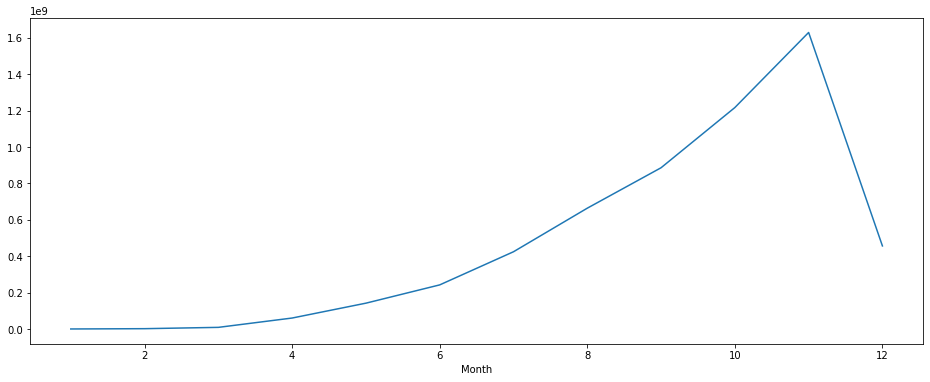

In [15]:
plt.figure(figsize=(16,6))
data.groupby('Month').sum()['Confirmed'].plot();

**Посмотрим как коронавирус распространялся с течением времени.**


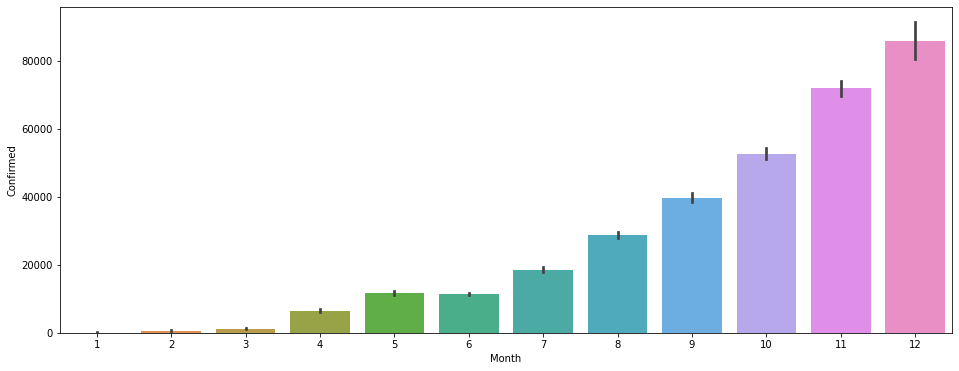

In [16]:
plt.figure(figsize=(16,6))
sns.barplot(x='Month',y='Confirmed',data=data);

# Глубокий разведочный анализ данных (EDA)

In [17]:
latest_data.groupby('Country/Region').sum()

,SNo,Confirmed,Deaths,Recovered,Month,Day,Hour
Country/Region,,,,,,,
Australia,1275,9.0,0.0,2.0,3,90,48
Cambodia,422,1.0,0.0,0.0,1,30,16
Canada,841,3.0,0.0,0.0,2,60,32
Finland,428,1.0,0.0,0.0,1,30,16
France,417,5.0,0.0,0.0,1,30,16
Germany,427,4.0,0.0,0.0,1,30,16
Hong Kong,403,10.0,0.0,0.0,1,30,16
India,431,1.0,0.0,0.0,1,30,16
Japan,412,11.0,0.0,1.0,1,30,16


* **Материковый Китай имеет ненулевые значения выздоровлений и смертей, которые можно изучить позже, создав отдельный набор данных**

In [18]:
data[data['Confirmed']==0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,1,22,17
10,11,01/22/2020,Heilongjiang,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,1,22,17
12,13,01/22/2020,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,1,22,17
15,16,01/22/2020,Inner Mongolia,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,1,22,17
18,19,01/22/2020,Jilin,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,1,22,17
...,...,...,...,...,...,...,...,...,...,...,...
172419,172420,12/06/2020,Unknown,India,2020-12-07 05:26:14,0.0,0.0,0.0,12,7,5
172421,172422,12/06/2020,Unknown,Mexico,2020-12-07 05:26:14,0.0,0.0,866186.0,12,7,5
172423,172424,12/06/2020,Unknown,Peru,2020-12-07 05:26:14,0.0,0.0,907654.0,12,7,5
172424,172425,12/06/2020,Unknown,Spain,2020-12-07 05:26:14,0.0,0.0,0.0,12,7,5


* **Интересно, что есть части материкового Китая, которые еще не были затронуты вирусом.**
* **Есть страны без подтвержденных случаев заражения, и мы отбросим их.**

In [19]:
data = data[data['Confirmed'] != 0]

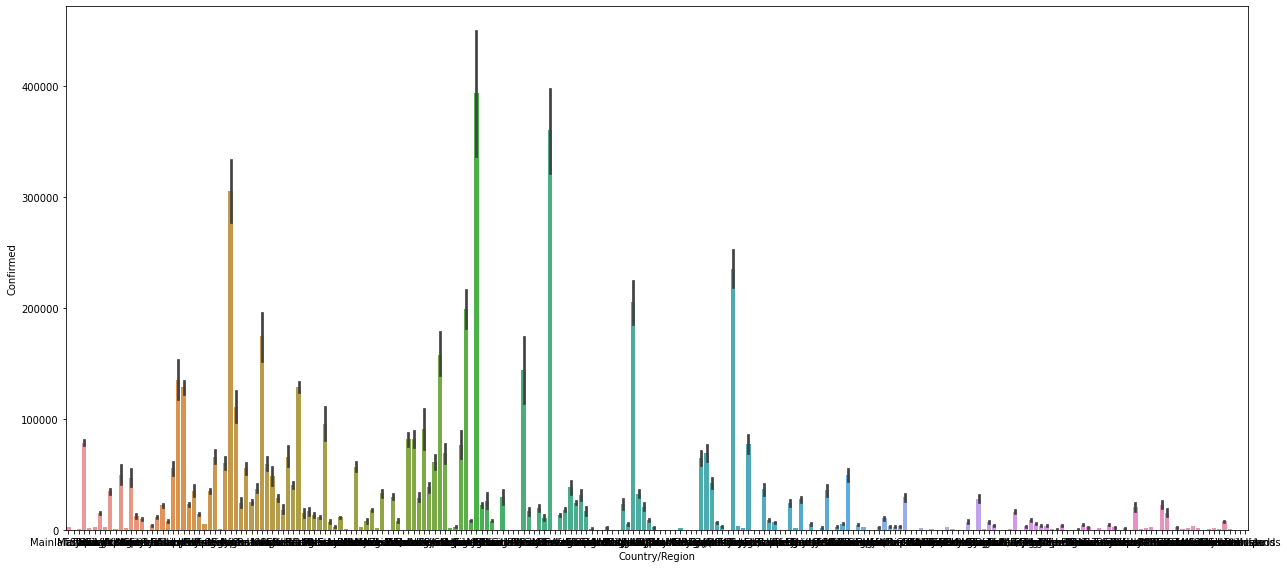

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x='Country/Region',y='Confirmed',data=data)
plt.tight_layout()

1. **На графике показано то, что мы все знаем. Вирус больше всего затронул материковый Китай, однако есть сообщения о жертвах в соседних странах, что говорит о распространении вируса.**
2. **Есть также случаи, подтвержденные в странах, которые далеко, таких как США, Таиланд, Япония и т. Д.  **

In [21]:
import plotly.express as px
fig = px.bar(data, x='Province/State', y='Confirmed')
a = fig.to_html()

In [22]:
b = open('file.html', 'w')
b.write(a)
b.close()

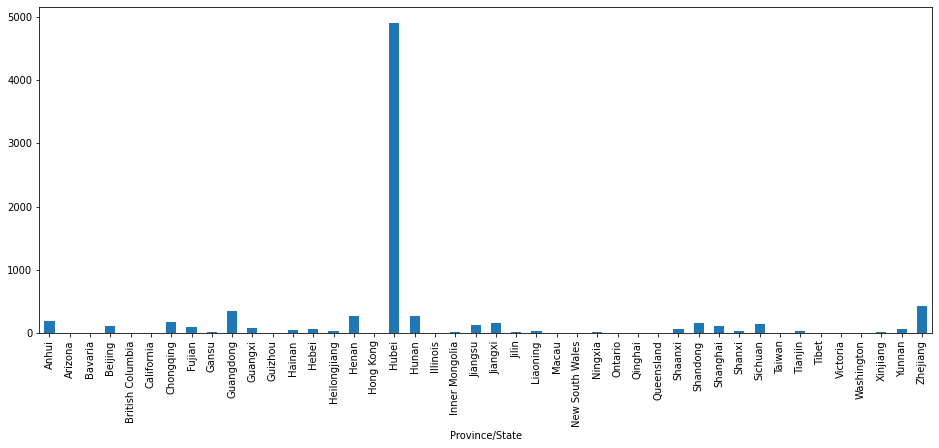

In [23]:
plt.figure(figsize=(16,6))
temp = latest_data.groupby(['Province/State']).sum()['Confirmed'].plot.bar()

## Анализ роста коронавируса  в каждой стране

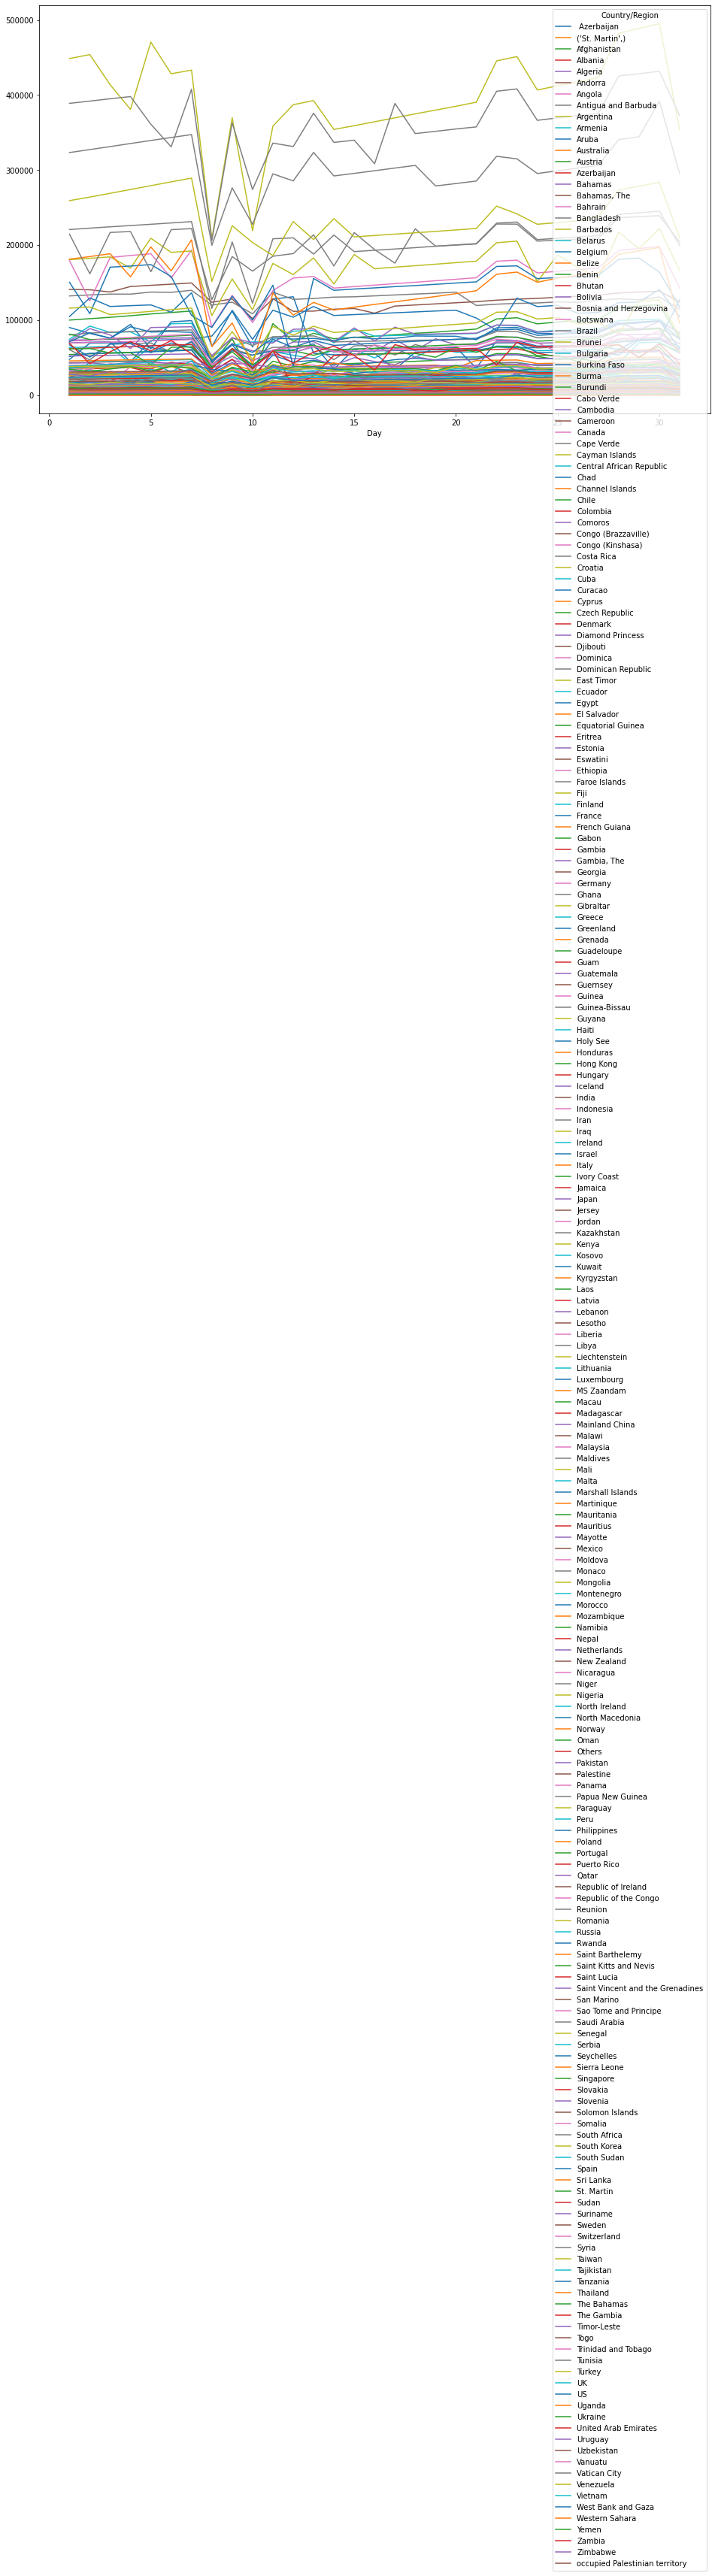

In [24]:
pivoted = pd.pivot_table(data, values='Confirmed', columns='Country/Region', index='Day')
pivoted.plot(figsize=(16,10));

### Визуализация вспышки в провинции Hubei

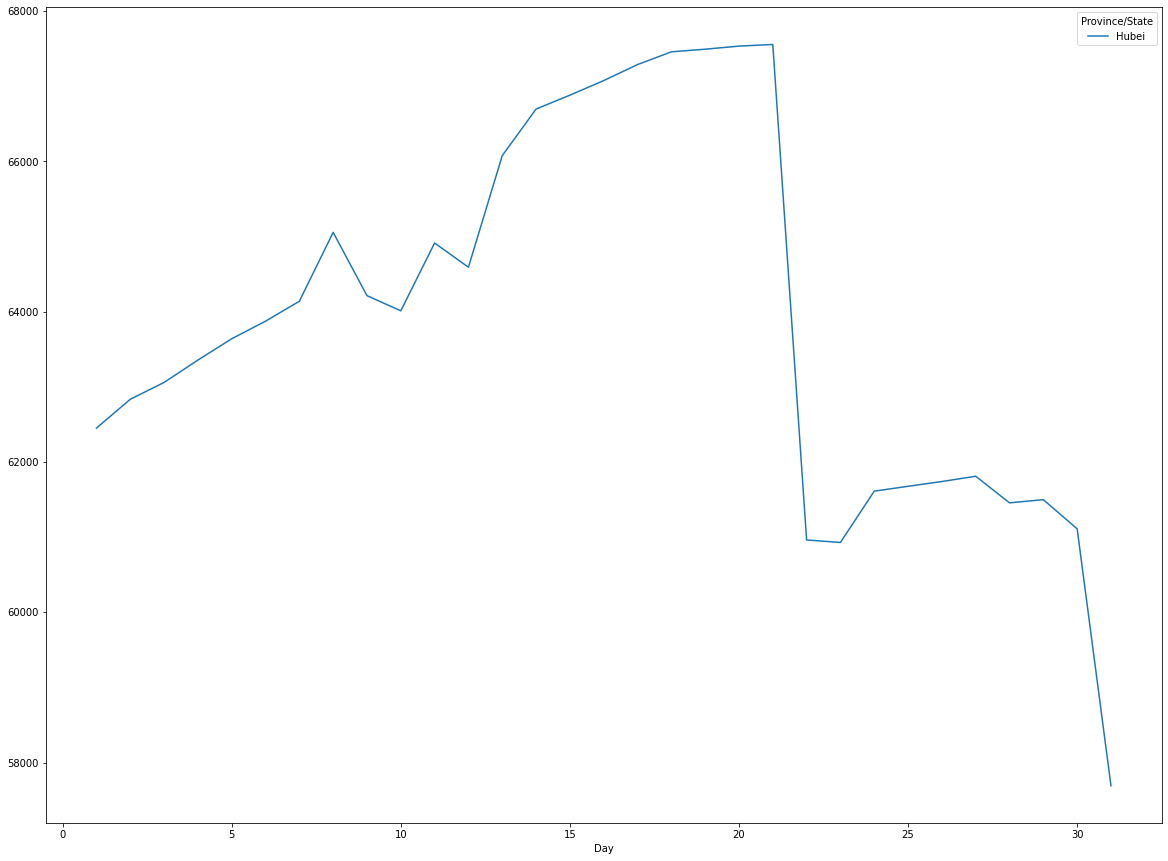

In [25]:
pivoted = pd.pivot_table(data[data['Province/State']=='Hubei'], values='Confirmed', columns='Province/State', index='Day')
pivoted.plot(figsize=(20,15));

Теперь давайте посмотрим на страны, которые были затронуты изначально, и страны, в которые сейчас проник коронавирус.

In [26]:
data[(data['Month'] == 12) & (data['Day'] == 7)]['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'Indones

Итак, в первый день, 22 января заражения были обнаружены в Китае, США, Японии, Таиланде

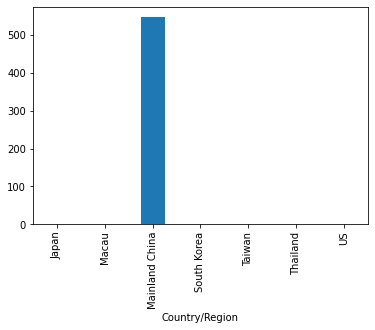

In [27]:
temp = data[(data['Month'] == 1) & (data['Day'] == 22)]
temp.groupby('Country/Region').sum()['Confirmed'].plot.bar();

Теперь, посмотрим на последние данные января.

In [28]:
data[(data['Month'] == 1) & (data['Day'] == 30)]['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Taiwan', 'Macau', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka',
       'Australia', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India'], dtype=object)

 в каких странах вспышка распространилась к 30 января.

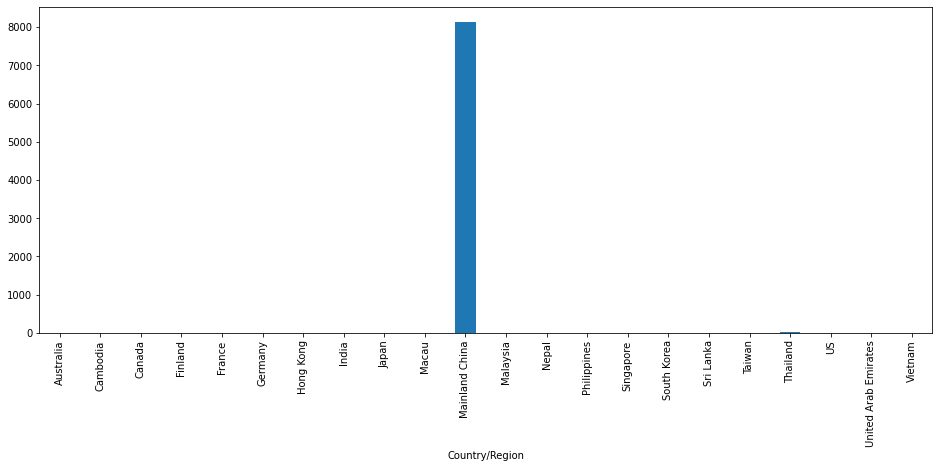

In [29]:
plt.figure(figsize=(16,6))
temp = data[(data['Month'] == 1) & (data['Day'] == 30)]
temp.groupby('Country/Region').sum()['Confirmed'].plot.bar();

# Рассмотрим только материковый Китай

In [30]:
data_main_china = latest_data[latest_data['Country/Region']=='Mainland China']

In [31]:
(data_main_china['Deaths'].sum() / data_main_china['Confirmed'].sum())*100

2.104874446085672

In [32]:
(data_main_china['Recovered'].sum() / data_main_china['Confirmed'].sum())*100

1.6617429837518465

## Где произошло большинство смертей

In [33]:
data_main_china.groupby('Province/State')['Deaths'].sum().reset_index().sort_values(by=['Deaths'],ascending=False).head()

,Province/State,Deaths
12,Hubei,162.0
10,Heilongjiang,2.0
11,Henan,2.0
9,Hebei,1.0
1,Beijing,1.0


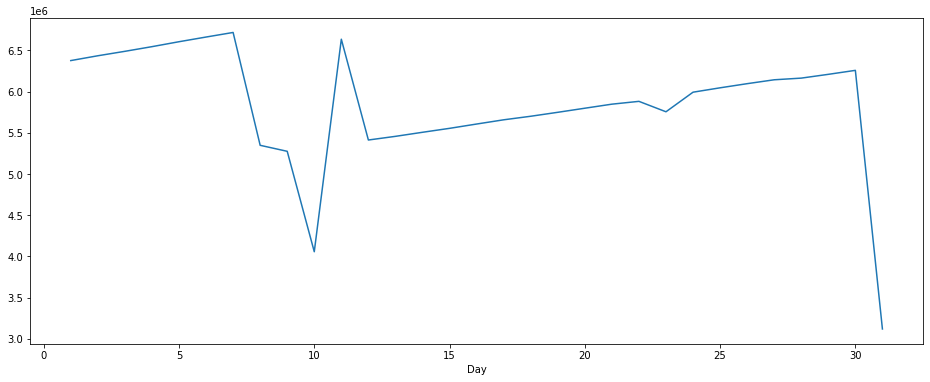

In [34]:
plt.figure(figsize=(16,6))
data.groupby('Day').sum()['Deaths'].plot();

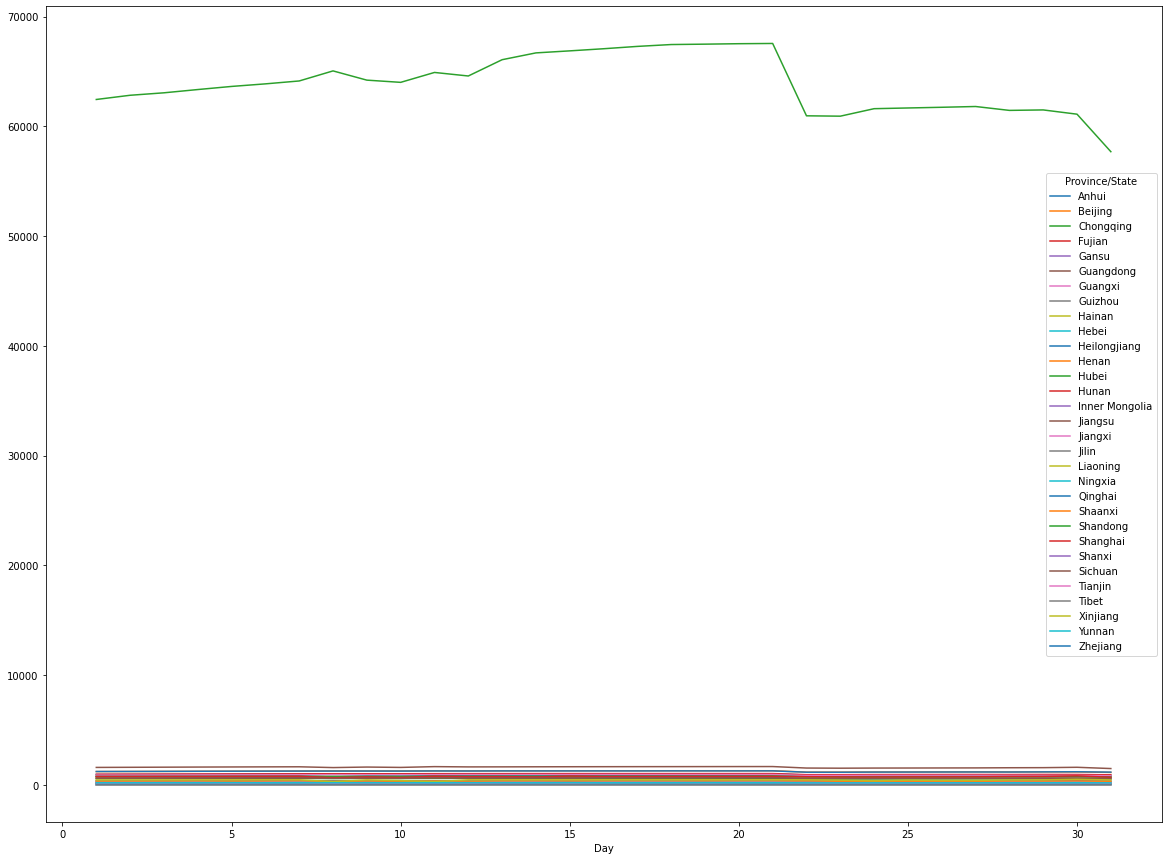

In [35]:
pivoted = pd.pivot_table(data[data['Country/Region']=='Mainland China'] , values='Confirmed', 
                         columns='Province/State', index='Day')
pivoted.plot(figsize=(20,15));

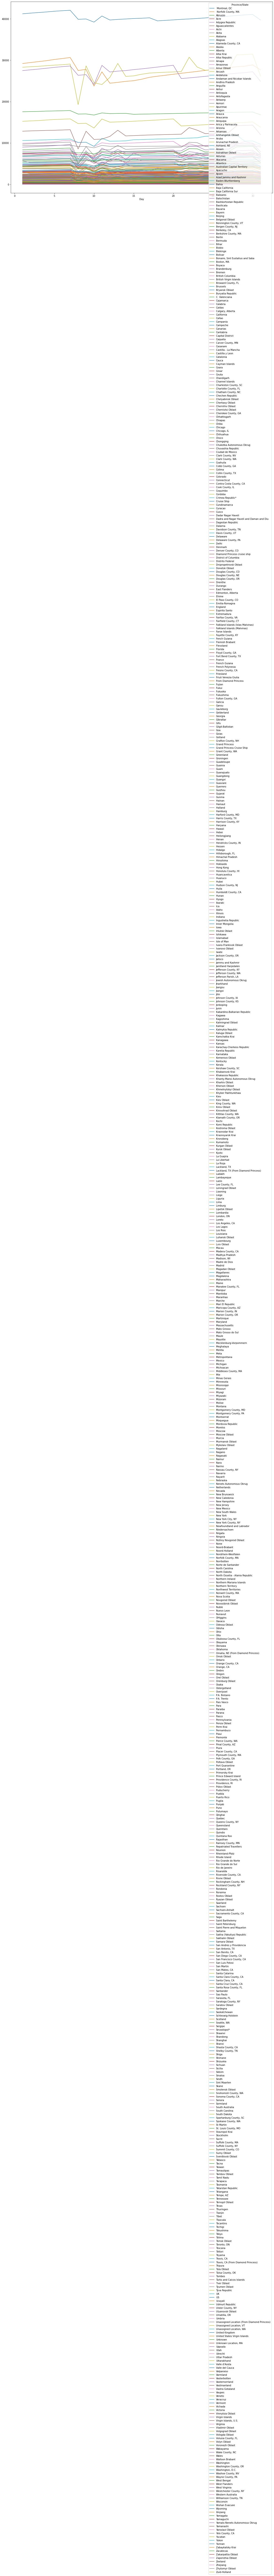

In [36]:
pivoted = pd.pivot_table(data, values='Deaths', columns='Province/State', index='Day')
pivoted.plot(figsize=(20,15));

# Задание: Получить данные по России.

1. Вывести описательные статистики по регионам, исключая Москву (pandas)
2. Выбрать регион с самым большим количеством заражений. Визуализировать результаты (matplotlib):
    - 2.1    Вывести статистику за все время и за текущую дату:
    - 2.2    Кол-во зараженных;
    - 2.3    Кол-во выздоровевших;
    - 2.4    Кол-во умерших
3. Найти дату с максимальным числом выявленных заражений в Республике Татарстан.
4. Проанализировать темпы роста заболевших и выздоровевших.
5. Сделать прогноз по заражениям и выздоровлениям на 1 декабря (scikit-learn LinearRegression).

In [37]:
#ваш код 1. Вывести описательные статистики по регионам, исключая Москву (pandas)
data_of_russia = data[(data['Country/Region'] == 'Russia') & (data['Province/State'] != 'Moscow')]
data_of_russia

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
482,483,01/31/2020,NaN,Russia,2020-01-31 23:59:00,2.0,0.0,0.0,1,31,23
540,541,02/01/2020,NaN,Russia,2020-01-31 16:13:00,2.0,0.0,0.0,1,31,16
610,611,02/02/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,1,31,16
677,678,02/03/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,1,31,16
745,746,02/04/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,1,31,16
...,...,...,...,...,...,...,...,...,...,...,...
172450,172451,12/06/2020,Vologda Oblast,Russia,2020-12-07 05:26:14,14308.0,226.0,11106.0,12,7,5
172452,172453,12/06/2020,Voronezh Oblast,Russia,2020-12-07 05:26:14,36576.0,687.0,34380.0,12,7,5
172466,172467,12/06/2020,Yamalo-Nenets Autonomous Okrug,Russia,2020-12-07 05:26:14,27510.0,273.0,19138.0,12,7,5
172468,172469,12/06/2020,Yaroslavl Oblast,Russia,2020-12-07 05:26:14,17554.0,100.0,16381.0,12,7,5


In [38]:
data_of_russia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15620 entries, 482 to 172472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              15620 non-null  int64         
 1   ObservationDate  15620 non-null  object        
 2   Province/State   15498 non-null  object        
 3   Country/Region   15620 non-null  object        
 4   Last Update      15620 non-null  datetime64[ns]
 5   Confirmed        15620 non-null  float64       
 6   Deaths           15620 non-null  float64       
 7   Recovered        15620 non-null  float64       
 8   Month            15620 non-null  int64         
 9   Day              15620 non-null  int64         
 10  Hour             15620 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.4+ MB


In [39]:
data_of_russia.describe()

,SNo,Confirmed,Deaths,Recovered,Month,Day,Hour
count,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000
mean,101289.031690,10537.318950,173.748207,7692.993470,8.599424,15.406658,4.207554
std,41109.547408,16620.322386,394.195577,9193.487707,1.844915,8.891867,1.198659
min,483.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,65968.750000,3992.750000,33.000000,2727.750000,7.000000,7.000000,4.000000
50%,101250.500000,7012.500000,69.000000,5377.500000,9.000000,15.000000,4.000000
75%,136754.750000,12093.250000,157.000000,9295.500000,10.000000,23.000000,4.000000
max,172473.000000,405843.000000,5830.000000,171883.000000,12.000000,31.000000,23.000000


In [40]:
#ваш код 2. Выбрать регион с самым большим количеством заражений. Визуализировать результаты (matplotlib)
regions = pd.DataFrame(data={'Region': data_of_russia['Province/State'].unique(),
    'Values': [data_of_russia[data_of_russia['Province/State'] == region]['Confirmed'].max() 
                                     for region in data_of_russia['Province/State'].unique()]})

In [41]:
max_confirmed_region =  regions.iloc[regions['Values'].idxmax()]
print('регион с самым большим количеством заражений:', max_confirmed_region['Region'], 
            '\nВ количестве: ', max_confirmed_region['Values'])

регион с самым большим количеством заражений: Saint Petersburg 
В количестве:  148153.0


In [42]:
data_of_max_region = data_of_russia[data_of_russia['Province/State'] == max_confirmed_region['Region']]
last_date = data_of_max_region['ObservationDate'].max()

In [43]:
print('количество зараженных:', 
    data_of_max_region[data_of_max_region['ObservationDate'] == last_date]['Confirmed'].to_list()[0])

количество зараженных: 148153.0


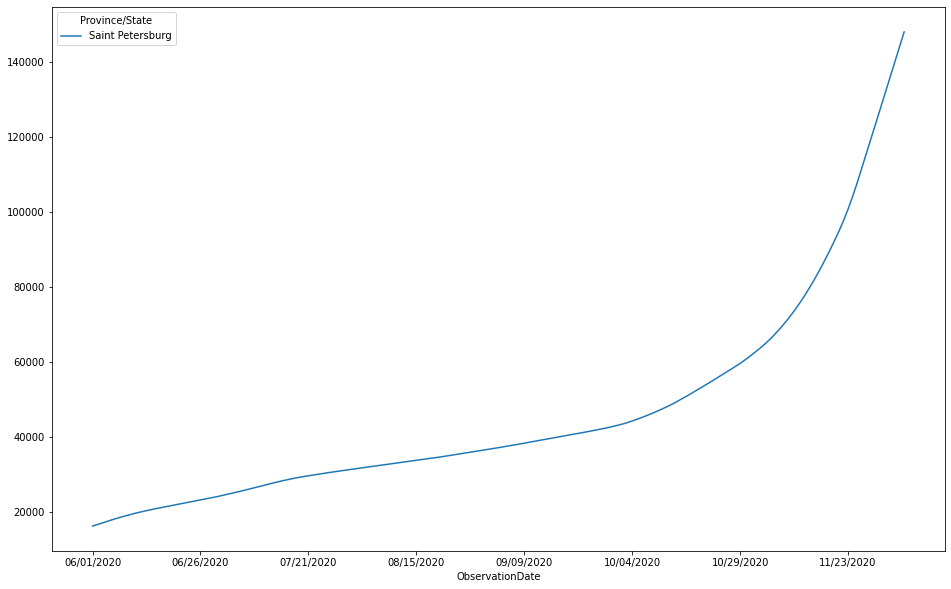

In [44]:
pivoted = pd.pivot_table(data_of_max_region, values='Confirmed', columns='Province/State', index='ObservationDate')
pivoted.plot(figsize=(16,10));

In [45]:
print('количество выздоровевших:', 
    data_of_max_region[data_of_max_region['ObservationDate']==last_date]['Recovered'].to_list()[0])

количество выздоровевших: 85461.0


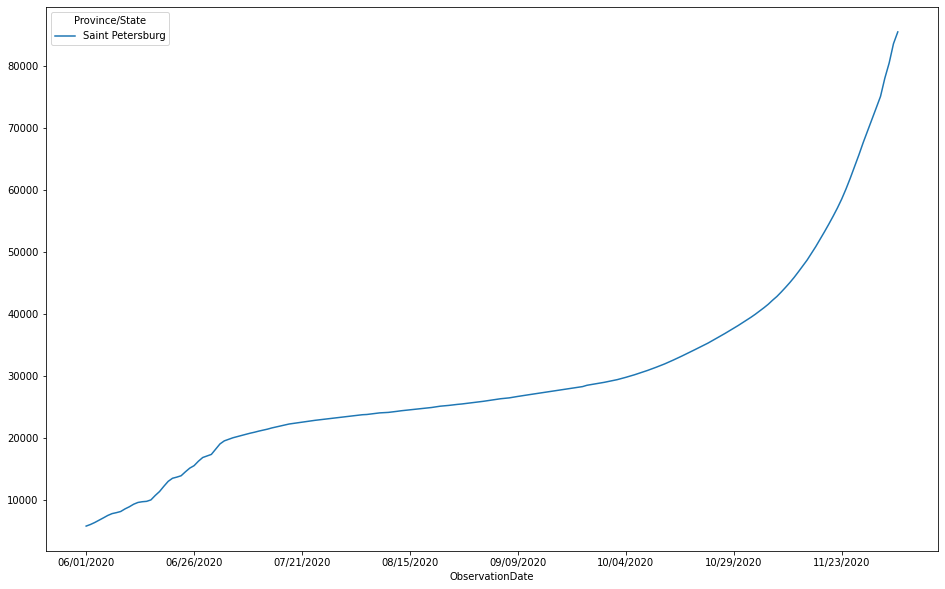

In [46]:
pivoted = pd.pivot_table(data_of_max_region, values='Recovered', columns='Province/State', index='ObservationDate')
pivoted.plot(figsize=(16,10));

In [47]:
print('количество умерших:', 
    data_of_max_region[data_of_max_region['ObservationDate']==last_date]['Deaths'].to_list()[0])

количество умерших: 5830.0


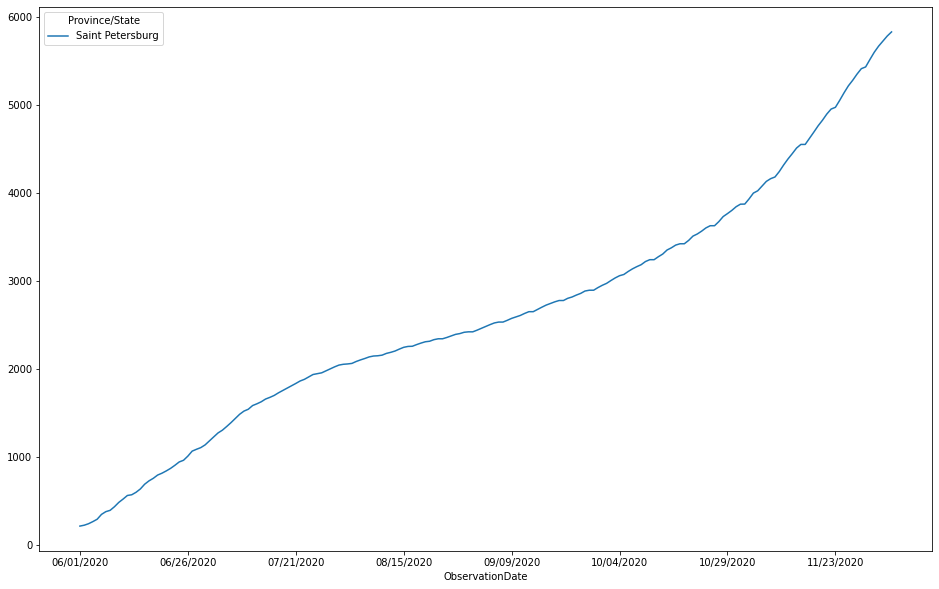

In [48]:
pivoted = pd.pivot_table(data_of_max_region, values='Deaths', columns='Province/State', index='ObservationDate')
pivoted.plot(figsize=(16,10));

In [49]:
#ваш код 3.Найти дату с максимальным числом выявленных заражений в Республике Татарстан.
data_of_tatarstan = data_of_russia[data_of_russia['Province/State'] == 'Tatarstan Republic']

In [50]:
print(data_of_tatarstan[data_of_tatarstan['Confirmed'] == data_of_tatarstan['Confirmed'].max()]['ObservationDate'].to_list()[0])

12/06/2020


<AxesSubplot:xlabel='ObservationDate'>

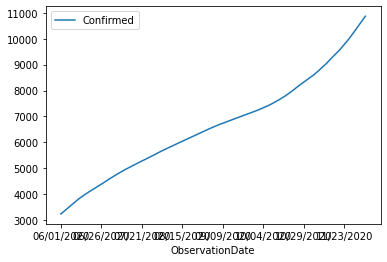

In [51]:
#ваш код 4. Проанализировать темпы роста заболевших и выздоровевших.
data_of_tatarstan.plot(x='ObservationDate', y='Confirmed')

<AxesSubplot:xlabel='ObservationDate'>

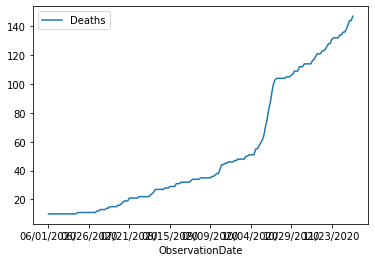

In [52]:
data_of_tatarstan.plot(x='ObservationDate', y='Deaths')

In [53]:
data_of_tatarstan.describe()

,SNo,Confirmed,Deaths,Recovered,Month,Day,Hour
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,102165.063492,6645.068783,52.989418,5635.285714,8.640212,15.402116,4.142857
std,40602.700634,1896.475752,43.201654,1717.084306,1.794694,8.913723,0.623745
min,33208.000000,3244.000000,10.000000,2690.000000,6.000000,1.000000,2.000000
25%,67101.000000,5186.000000,19.000000,4135.000000,7.000000,7.000000,4.000000
50%,102037.000000,6591.000000,35.000000,5443.000000,9.000000,15.000000,4.000000
75%,136996.000000,7899.000000,104.000000,6772.000000,10.000000,23.000000,4.000000
max,172387.000000,10865.000000,147.000000,9479.000000,12.000000,31.000000,6.000000


In [54]:
#ваш код 5. Сделать прогноз по заражениям и выздоровлениям на 1 декабря (scikit-learn LinearRegression).
from sklearn.linear_model import LinearRegression

In [55]:
data_for_training = data_of_tatarstan[data_of_tatarstan['ObservationDate'] < '12/01/2020']
data_for_training

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
33207,33208,06/01/2020,Tatarstan Republic,Russia,2020-06-02 02:33:08,3244.0,10.0,2690.0,6,2,2
33871,33872,06/02/2020,Tatarstan Republic,Russia,2020-06-03 02:33:13,3297.0,10.0,2814.0,6,3,2
34536,34537,06/03/2020,Tatarstan Republic,Russia,2020-06-04 02:33:14,3351.0,10.0,2991.0,6,4,2
35201,35202,06/04/2020,Tatarstan Republic,Russia,2020-06-05 02:33:06,3402.0,10.0,3130.0,6,5,2
35880,35881,06/05/2020,Tatarstan Republic,Russia,2020-06-06 02:33:00,3452.0,10.0,3235.0,6,6,2
...,...,...,...,...,...,...,...,...,...,...,...
164786,164787,11/26/2020,Tatarstan Republic,Russia,2020-11-27 05:26:53,10000.0,132.0,8743.0,11,27,5
165546,165547,11/27/2020,Tatarstan Republic,Russia,2020-11-28 05:25:50,10083.0,132.0,8820.0,11,28,5
166306,166307,11/28/2020,Tatarstan Republic,Russia,2020-11-29 05:25:55,10168.0,134.0,8912.0,11,29,5
167066,167067,11/29/2020,Tatarstan Republic,Russia,2020-11-30 05:26:13,10255.0,134.0,9000.0,11,30,5


In [56]:
res_data = data_of_tatarstan[data_of_tatarstan['ObservationDate'] == '12/01/2020']
res_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month,Day,Hour
168586,168587,12/01/2020,Tatarstan Republic,Russia,2020-12-02 05:27:41,10424.0,136.0,9139.0,12,2,5


In [57]:
X = data_for_training.loc[:, ['Deaths', 'Recovered']]
Y = data_for_training.loc[:, 'Confirmed']

In [58]:
confirmed = LinearRegression().fit(X.astype(np.float32), Y)

In [59]:
print('предсказание по количеству заболевших:', confirmed.predict(res_data.loc[:, ['Deaths', 'Recovered']])[0])
print('фактическое количество заболевших:', res_data.loc[:, 'Confirmed'].to_list()[0])

предсказание по количеству заболевших: 10522.527227759361
фактическое количество заболевших: 10424.0


In [60]:
X = data_for_training.loc[:, ['Deaths', 'Confirmed']]
Y = data_for_training.loc[:, 'Recovered']

In [61]:
recovered = LinearRegression().fit(X.astype(np.float32), Y)

In [62]:
print('предсказание по количеству выздоровевших:', recovered.predict(res_data.loc[:, ['Deaths', 'Confirmed']])[0])
print('фактическое количество выздоровевших:', res_data.loc[:, 'Recovered'].to_list()[0])

предсказание по количеству выздоровевших: 9036.318586826324
фактическое количество выздоровевших: 9139.0
